### Import required Libraries

In [1]:
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
import spacy
from spacy import displacy 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/vatsal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vatsal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vatsal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/vatsal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Read the text and apply Preprocessing

### Read the text file

In [2]:
file = open('./sommerville.txt', 'r', encoding='utf-8')
T1 = file.read()

### Apply the preprocessing

In [3]:
# Remove Footer
T1 = re.sub('.* 4/4/06 .*\n', '', T1)
T1 = re.sub('[ ]*••[ ]*••\n', '', T1)

# Remove Header
T1 = re.sub('[0-9]+[ ]+Chapter.*\n', '', T1)
T1 = re.sub('[0-9]+.[0-9]+ ■.*[0-9]+\n', '', T1)
T1 = re.sub('Chapter [0-9]+ ■.*[0-9]+\n', '', T1)

# Remove all heading from the Text
T1 = re.sub(r'\d+(\.\d+)*\.\d+.*\n', '', T1)

# Remove Chapter Title
T1 = re.sub('[0-9]+\n[a-zA-Z ]+\n', '', T1)

# Join broken words
T1 = re.sub(r'-\n\s*', '', T1)

#Removing punctuations
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~■'''
cleantext = ""
for char in T1:
    if char not in punctuations:
        cleantext = cleantext + char

T1 = cleantext

# Remove tables 
arr = T1.split('\n')

allLines = []

idx = 0

for i in range(0, len(arr)):
  # Split each line into columns based on groups of spaces
  temp = re.split(r'\s{2,}', arr[i])
  if len(temp) <= 2:
    allLines.insert(idx, temp)
    idx += 1

finalText = ''
for k in allLines: 
  if (len(k) > 1):
    finalText += ' ' + k[1].lower()

finalText[:2500]

'  objectives the objectives of this chapter are to introduce software engineering and to provide a framework for understanding the rest of the book when you have read this chapter you will understand what software engineering is and why it is important know the answers to key questions that provide an introduction to software engineering understand some ethical and professional issues that are important for software engineers contents   virtually all countries now depend on complex computerbased systems national infrastructures and utilities rely on computerbased systems and most electrical products include a computer and controlling software industrial manufacturing and distribution is completely computerised as is the financial system therefore producing and maintaining software costeffectively is essential for the functioning of national and international economies software engineering is an engineering discipline whose focus is the costeffective development of highquality software

## Create WordCloud with stopwords

## Tokenize the text

In [4]:
#Tokenizing the text
tokens = nltk.word_tokenize(finalText)
tokens

['objectives',
 'the',
 'objectives',
 'of',
 'this',
 'chapter',
 'are',
 'to',
 'introduce',
 'software',
 'engineering',
 'and',
 'to',
 'provide',
 'a',
 'framework',
 'for',
 'understanding',
 'the',
 'rest',
 'of',
 'the',
 'book',
 'when',
 'you',
 'have',
 'read',
 'this',
 'chapter',
 'you',
 'will',
 'understand',
 'what',
 'software',
 'engineering',
 'is',
 'and',
 'why',
 'it',
 'is',
 'important',
 'know',
 'the',
 'answers',
 'to',
 'key',
 'questions',
 'that',
 'provide',
 'an',
 'introduction',
 'to',
 'software',
 'engineering',
 'understand',
 'some',
 'ethical',
 'and',
 'professional',
 'issues',
 'that',
 'are',
 'important',
 'for',
 'software',
 'engineers',
 'contents',
 'virtually',
 'all',
 'countries',
 'now',
 'depend',
 'on',
 'complex',
 'computerbased',
 'systems',
 'national',
 'infrastructures',
 'and',
 'utilities',
 'rely',
 'on',
 'computerbased',
 'systems',
 'and',
 'most',
 'electrical',
 'products',
 'include',
 'a',
 'computer',
 'and',
 'cont

### Plotting the frequency of words without removing stopwords

## Removing the stopwords

### Removing stopwords

In [5]:
#Removing Stopwords
stop_words =set(stopwords.words('english'))
filtered_tokens =[w for w in tokens if w not in stop_words]
tokens = filtered_tokens
finalText = " "
finalText = finalText.join(tokens)
finalText[:5000]

'objectives objectives chapter introduce software engineering provide framework understanding rest book read chapter understand software engineering important know answers key questions provide introduction software engineering understand ethical professional issues important software engineers contents virtually countries depend complex computerbased systems national infrastructures utilities rely computerbased systems electrical products include computer controlling software industrial manufacturing distribution completely computerised financial system therefore producing maintaining software costeffectively essential functioning national international economies software engineering engineering discipline whose focus costeffective development highquality software systems software abstract intangible constrained materials governed physical laws manufacturing processes ways simplifies software engineering physical limitations potential software however lack natural constraints means so

## POS Tagging

### Perform POS Tagging 

In [6]:
#POS Tagging
postTag = nltk.pos_tag(tokens)
postTag

[('objectives', 'NNS'),
 ('objectives', 'VBZ'),
 ('chapter', 'NN'),
 ('introduce', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('provide', 'NN'),
 ('framework', 'NN'),
 ('understanding', 'VBG'),
 ('rest', 'JJ'),
 ('book', 'NN'),
 ('read', 'VBP'),
 ('chapter', 'NN'),
 ('understand', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('important', 'JJ'),
 ('know', 'VBP'),
 ('answers', 'NNS'),
 ('key', 'JJ'),
 ('questions', 'NNS'),
 ('provide', 'VBP'),
 ('introduction', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('understand', 'JJ'),
 ('ethical', 'JJ'),
 ('professional', 'NN'),
 ('issues', 'NNS'),
 ('important', 'JJ'),
 ('software', 'NN'),
 ('engineers', 'NNS'),
 ('contents', 'NNS'),
 ('virtually', 'RB'),
 ('countries', 'NNS'),
 ('depend', 'VBP'),
 ('complex', 'JJ'),
 ('computerbased', 'VBN'),
 ('systems', 'NNS'),
 ('national', 'JJ'),
 ('infrastructures', 'NNS'),
 ('utilities', 'NNS'),
 ('rely', 'VBP'),
 ('computerbased', 'JJ'),
 ('systems', 'NNS'),
 ('electrical', 'J

In [7]:
cat_freq = {}
f = []
for word in set(postTag):
  if (word[1] == 'NN'):
    for syn in wn.synsets(word[0], wn.NOUN):
      key = syn.lexname().split('.')[1]
      if (key in cat_freq):
        cat_freq[key] += 1
      else:
        cat_freq[key] = 1
      f.append(key)
      print(word[0], syn.lexname())

constraint noun.state
constraint noun.artifact
constraint noun.act
remainder noun.relation
remainder noun.quantity
remainder noun.quantity
remainder noun.artifact
zone noun.location
zone noun.location
zone noun.location
zone noun.body
aircraft noun.artifact
policeman noun.person
complexity noun.attribute
formality noun.event
formality noun.attribute
formality noun.act
convention noun.group
convention noun.cognition
convention noun.communication
convention noun.attribute
convention noun.act
implementation noun.act
implementation noun.act
incoming noun.act
consumption noun.act
consumption noun.state
consumption noun.process
consumption noun.act
accounting noun.communication
accounting noun.cognition
accounting noun.act
accounting noun.possession
accounting noun.possession
nurse noun.person
nurse noun.person
layout noun.cognition
layout noun.act
defect noun.state
defect noun.attribute
defect noun.state
defect noun.attribute
handbook noun.communication
survey noun.act
survey noun.communica

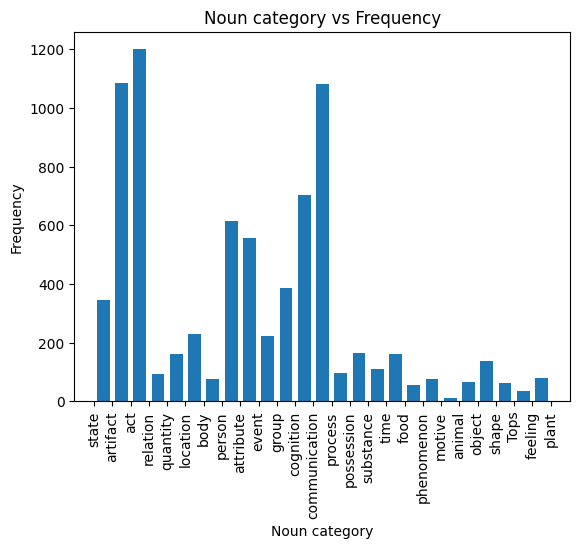

In [8]:
cat = [x for (x, y) in cat_freq.items()]
plt.hist(f, bins=cat, rwidth=0.7)
plt.xlabel('Noun category')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.title('Noun category vs Frequency')
plt.show()

produce verb.creation
produce verb.creation
produce verb.creation
produce verb.perception
produce verb.creation
produce verb.perception
produce verb.body
disclose verb.communication
disclose verb.perception
worn verb.body
worn verb.body
worn verb.stative
worn verb.change
worn verb.body
worn verb.stative
worn verb.contact
worn verb.body
worn verb.body
limit verb.change
limit verb.change
limit verb.communication
invite verb.emotion
invite verb.social
invite verb.emotion
invite verb.communication
invite verb.social
invite verb.contact
invite verb.communication
invite verb.contact
repair verb.change
repair verb.possession
repair verb.motion
repair verb.change
repair verb.body
delivered verb.communication
delivered verb.contact
delivered verb.possession
delivered verb.social
delivered verb.social
delivered verb.communication
delivered verb.communication
delivered verb.social
delivered verb.possession
delivered verb.possession
delivered verb.contact
delivered verb.body
recruit verb.social
re

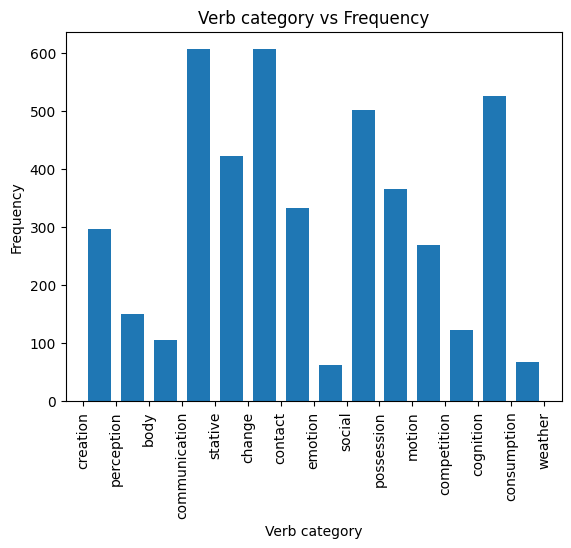

In [9]:
cat_freq1 = {}
f1 = []
for word in set(postTag):
  if (word[1] == 'VB'):
    for syn in wn.synsets(word[0], wn.VERB):
      key = syn.lexname().split('.')[1]
      if (key in cat_freq1):
        cat_freq1[key] += 1
      else:
        cat_freq1[key] = 1
      f1.append(key)
      print(word[0], syn.lexname())


cat1 = [x for (x, y) in cat_freq1.items()]
plt.hist(f1, bins=cat1, rwidth=0.7)
plt.xlabel('Verb category')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.title('Verb category vs Frequency')
plt.show()

In [10]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(finalText)

In [11]:
displacy.render(doc[8000:9000], style='ent', jupyter=True)

In [12]:
TP = 3
FN = 2
FP = 0
TN = 995

accuracy = (TP + TN) / (TP + FN + FP + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1Score = 2 * precision * recall / (precision + recall)

accuracy, F1Score

(0.998, 0.7499999999999999)

In [13]:
displacy.render(doc[8000:9000], style='dep', jupyter=True)